In [25]:
import sys
import matplotlib.animation
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('animation', html='jshtml')


In [26]:

import gymnasium as gym
env = gym.make("CartPole-v1", render_mode="rgb_array")


In [27]:
obs, info = env.reset(seed=42)
print(obs, info)


[ 0.0273956  -0.00611216  0.03585979  0.0197368 ] {}


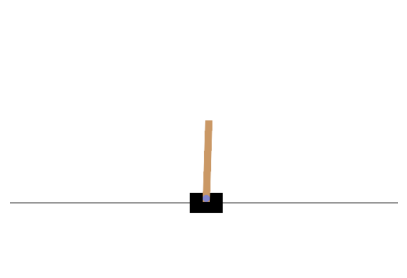

In [28]:
img = env.render()
# creates a little function to render and plot an environment
def plot_environment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img
plot_environment(env)
plt.show()


In [29]:
env.action_space

Discrete(2)

In [30]:
action = 1  # accelerate right
obs, reward, done, truncated, info = env.step(action)
obs


array([ 0.02727336,  0.18847767,  0.03625453, -0.26141977], dtype=float32)

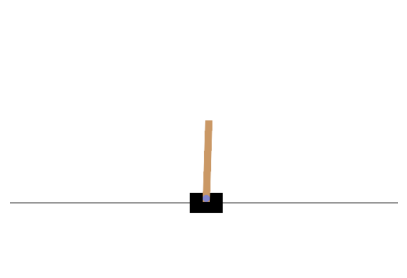

In [31]:
plot_environment(env)
plt.show()


In [32]:

print(f'reward: {reward}')
print(f'done: {done}')
print(f'truncated: {truncated}')
print(f'info: {info}')


reward: 1.0
done: False
truncated: False
info: {}


In [33]:
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs, info = env.reset(seed=episode)
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        episode_rewards += reward
        if done or truncated:
            break
    totals.append(episode_rewards)


In [34]:
import numpy as np
totals=np.array(totals)
totals, min(totals), max(totals)


(array([41., 51., 35., 36., 25., 39., 32., 34., 45., 48., 51., 43., 49.,
        52., 35., 51., 39., 39., 36., 37., 25., 36., 25., 40., 45., 35.,
        25., 38., 38., 39., 25., 32., 32., 27., 35., 39., 25., 25., 52.,
        56., 41., 41., 55., 56., 43., 37., 34., 49., 43., 45., 32., 35.,
        52., 46., 56., 54., 41., 35., 36., 56., 41., 35., 36., 35., 58.,
        48., 56., 39., 34., 38., 46., 35., 35., 36., 35., 35., 52., 35.,
        49., 42., 39., 39., 50., 45., 38., 38., 45., 36., 37., 36., 56.,
        51., 41., 53., 36., 35., 53., 50., 58., 49., 36., 35., 53., 36.,
        47., 56., 25., 53., 38., 35., 35., 53., 52., 41., 59., 49., 40.,
        45., 35., 36., 35., 38., 48., 53., 41., 48., 42., 39., 47., 39.,
        35., 40., 37., 44., 50., 40., 55., 45., 32., 40., 37., 38., 51.,
        53., 35., 41., 45., 31., 34., 35., 51., 52., 39., 41., 47., 46.,
        39., 47., 44., 48., 45., 36., 57., 31., 56., 47., 37., 43., 25.,
        54., 41., 57., 46., 35., 56., 41., 40., 46.

In [35]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,
def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = matplotlib.animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

def show_one_episode(policy, n_max_steps, seed):
    frames = []
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    obs, info = env.reset(seed=seed)
    for step in range(n_max_steps):
        frames.append(env.render())
        action = policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        if done or truncated:
            break
    env.close()
    return plot_animation(frames)


In [36]:
show_one_episode(basic_policy, 100, 333)